In [16]:
from ..analysis.scripts import project_functions
df = project_functions.load_and_process(r"..\..\data\raw\UniversitiesDataSet.csv")
df

ImportError: attempted relative import with no known parent package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv(r"..\..\data\raw\UniversitiesDataSet.csv")

In [17]:
df.head(2)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012


In [65]:
years = list(df.groupby('year').groups.keys())
years_i = df.groupby('year')
def uni_eda(df): 
    for i in range(len(years)):
        
        df_h = years_i.get_group(years[i])
        eda_df = {}
        eda_df['null_sum'] = df_h.isnull().sum()
        eda_df['dtypes'] = df_h.dtypes
        eda_df['mean'] = df_h.mean()
        eda_df['median'] = df_h.median()
        eda_df['min'] = df_h.min()
        eda_df['max'] = df_h.max()
        
    return pd.DataFrame(eda_df)
uni_eda(df)

C:\Users\ww\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,null_sum,dtypes,mean,median,min,max
alumni_employment,0,int64,406.53600,500.50,1,567
broad_impact,0,float64,496.66400,495.00,1,1000
citations,0,int64,451.33400,428.00,1,812
country,0,object,NaN,NaN,Argentina,Uruguay
influence,0,int64,500.27500,500.50,1,991
institution,0,object,NaN,NaN,AGH University of Science and Technology,Örebro University
national_rank,0,int64,42.51200,22.00,1,229
patents,0,int64,491.67400,500.50,1,871
publications,0,int64,500.41900,500.50,1,1000
quality_of_education,0,int64,299.83900,367.00,1,367


<AxesSubplot:>

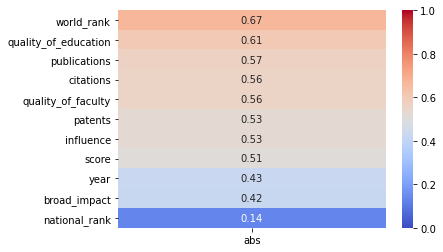

In [50]:
correlations = df.corrwith(df['alumni_employment']).to_frame().drop('alumni_employment')
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values(['abs'], ascending=False)['abs']
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=0, vmax=1)

dict_keys([2012, 2013, 2014, 2015])

4

In [62]:
years = list(df.groupby('year').groups.keys())
years_i = df.groupby('year')
years_i.get_group(years[0])

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,University of Texas MD Anderson Cancer Center,USA,58,101,101,101,95,46,66,NaN,100,43.88,2012
96,97,University of Nottingham,United Kingdom,6,101,101,87,101,101,101,NaN,92,43.79,2012
97,98,University of Bristol,United Kingdom,7,101,101,78,75,81,86,NaN,101,43.77,2012
98,99,Utrecht University,Netherlands,2,100,101,101,65,101,60,NaN,101,43.47,2012
